<br><br>
# Lab 4.  Logistic Regression
<br><br>

# 4.6.1 The Stock Market Data

In [2]:
# imports and setup
%matplotlib inline

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd

pd.set_option('precision', 2) # number precision for pandas
pd.set_option('display.max_rows', 12)
pd.set_option('display.float_format', '{:20,.2f}'.format) # get rid of scientific notation
plt.style.use('seaborn') # pretty matplotlib plots

In [3]:
# load data
smarket = pd.read_csv('data/Smarket.csv', index_col=0)
print(smarket.dtypes)
smarket

Lag1         float64
Lag2         float64
Lag3         float64
Lag4         float64
Lag5         float64
Volume       float64
Today        float64
Direction     object
dtype: object


,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
Year,,,,,,,,
2001,0.38,-0.19,-2.62,-1.05,5.01,1.19,0.96,Up
2001,0.96,0.38,-0.19,-2.62,-1.05,1.30,1.03,Up
2001,1.03,0.96,0.38,-0.19,-2.62,1.41,-0.62,Down
2001,-0.62,1.03,0.96,0.38,-0.19,1.28,0.61,Up
2001,0.61,-0.62,1.03,0.96,0.38,1.21,0.21,Up
2001,0.21,0.61,-0.62,1.03,0.96,1.35,1.39,Up
...,...,...,...,...,...,...,...,...
2005,0.25,-0.02,-0.58,-0.28,-0.14,2.07,0.42,Up
2005,0.42,0.25,-0.02,-0.58,-0.28,1.89,0.04,Up


In [4]:
# load data
smarket = pd.read_csv('data/Smarket.csv')
print(smarket.dtypes)
smarket

Year           int64
Lag1         float64
Lag2         float64
Lag3         float64
Lag4         float64
Lag5         float64
Volume       float64
Today        float64
Direction     object
dtype: object


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.38,-0.19,-2.62,-1.05,5.01,1.19,0.96,Up
1,2001,0.96,0.38,-0.19,-2.62,-1.05,1.30,1.03,Up
2,2001,1.03,0.96,0.38,-0.19,-2.62,1.41,-0.62,Down
3,2001,-0.62,1.03,0.96,0.38,-0.19,1.28,0.61,Up
4,2001,0.61,-0.62,1.03,0.96,0.38,1.21,0.21,Up
5,2001,0.21,0.61,-0.62,1.03,0.96,1.35,1.39,Up
...,...,...,...,...,...,...,...,...,...
1244,2005,0.25,-0.02,-0.58,-0.28,-0.14,2.07,0.42,Up
1245,2005,0.42,0.25,-0.02,-0.58,-0.28,1.89,0.04,Up
1246,2005,0.04,0.42,0.25,-0.02,-0.58,1.29,-0.95,Down


In [5]:
smarket.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 9 columns):
Year         1250 non-null int64
Lag1         1250 non-null float64
Lag2         1250 non-null float64
Lag3         1250 non-null float64
Lag4         1250 non-null float64
Lag5         1250 non-null float64
Volume       1250 non-null float64
Today        1250 non-null float64
Direction    1250 non-null object
dtypes: float64(7), int64(1), object(1)
memory usage: 151.4 KB


In [6]:
# object 타입에서 값이 반복될 때 catrgory 타입으로 바꾸면 작은 memory를 차지한다.
# 실제로는(under the hood) int 로 바꾸고, mapping table을 따로 둔 형태이다.

smarket.Direction = smarket.Direction.astype('category') 
print(smarket.dtypes)
smarket

Year            int64
Lag1          float64
Lag2          float64
Lag3          float64
Lag4          float64
Lag5          float64
Volume        float64
Today         float64
Direction    category
dtype: object


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.38,-0.19,-2.62,-1.05,5.01,1.19,0.96,Up
1,2001,0.96,0.38,-0.19,-2.62,-1.05,1.30,1.03,Up
2,2001,1.03,0.96,0.38,-0.19,-2.62,1.41,-0.62,Down
3,2001,-0.62,1.03,0.96,0.38,-0.19,1.28,0.61,Up
4,2001,0.61,-0.62,1.03,0.96,0.38,1.21,0.21,Up
5,2001,0.21,0.61,-0.62,1.03,0.96,1.35,1.39,Up
...,...,...,...,...,...,...,...,...,...
1244,2005,0.25,-0.02,-0.58,-0.28,-0.14,2.07,0.42,Up
1245,2005,0.42,0.25,-0.02,-0.58,-0.28,1.89,0.04,Up
1246,2005,0.04,0.42,0.25,-0.02,-0.58,1.29,-0.95,Down


In [20]:
smarket.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 9 columns):
Year         1250 non-null int64
Lag1         1250 non-null float64
Lag2         1250 non-null float64
Lag3         1250 non-null float64
Lag4         1250 non-null float64
Lag5         1250 non-null float64
Volume       1250 non-null float64
Today        1250 non-null float64
Direction    1250 non-null category
dtypes: category(1), float64(7), int64(1)
memory usage: 79.6 KB


In [11]:
smarket.columns

Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today',
       'Direction'],
      dtype='object')

In [12]:
smarket.shape

(1250, 9)

In [15]:
smarket.describe()
# The default behavior is to only provide a summary for the numerical columns

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,"1,250.00","1,250.00","1,250.00","1,250.00","1,250.00","1,250.00","1,250.00","1,250.00"
mean,"2,003.02",0.00,0.00,0.00,0.00,0.01,1.48,0.00
std,1.41,1.14,1.14,1.14,1.14,1.15,0.36,1.14
min,"2,001.00",-4.92,-4.92,-4.92,-4.92,-4.92,0.36,-4.92
25%,"2,002.00",-0.64,-0.64,-0.64,-0.64,-0.64,1.26,-0.64
50%,"2,003.00",0.04,0.04,0.04,0.04,0.04,1.42,0.04
75%,"2,004.00",0.60,0.60,0.60,0.60,0.60,1.64,0.60
max,"2,005.00",5.73,5.73,5.73,5.73,5.73,3.15,5.73


In [13]:
# to get a summary of all the columns
smarket.describe(include='all')

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
count,"1,250.00","1,250.00","1,250.00","1,250.00","1,250.00","1,250.00","1,250.00","1,250.00",1250
unique,nan,nan,nan,nan,nan,nan,nan,nan,2
top,nan,nan,nan,nan,nan,nan,nan,nan,Up
freq,nan,nan,nan,nan,nan,nan,nan,nan,648
mean,"2,003.02",0.00,0.00,0.00,0.00,0.01,1.48,0.00,NaN
std,1.41,1.14,1.14,1.14,1.14,1.15,0.36,1.14,NaN
min,"2,001.00",-4.92,-4.92,-4.92,-4.92,-4.92,0.36,-4.92,NaN
25%,"2,002.00",-0.64,-0.64,-0.64,-0.64,-0.64,1.26,-0.64,NaN
50%,"2,003.00",0.04,0.04,0.04,0.04,0.04,1.42,0.04,NaN
75%,"2,004.00",0.60,0.60,0.60,0.60,0.60,1.64,0.60,NaN


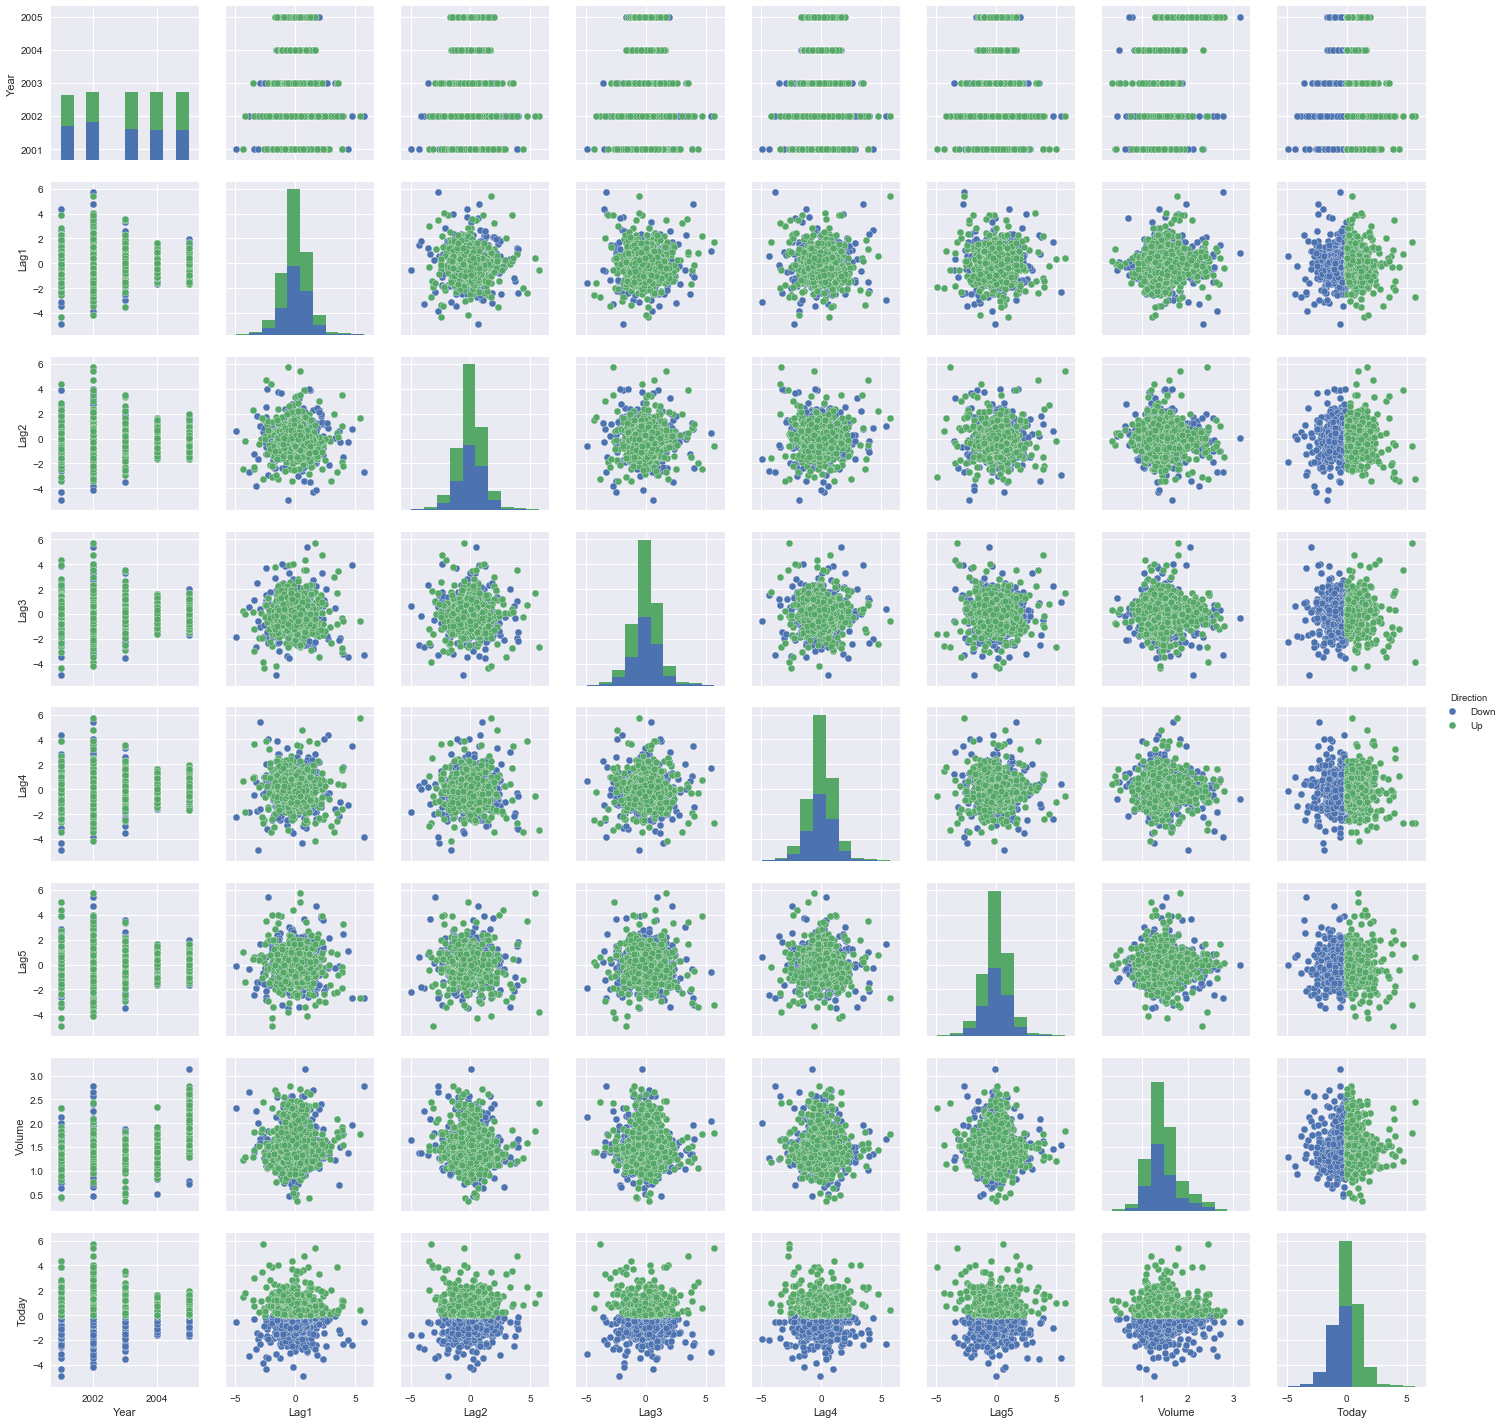

In [21]:
sns.pairplot(smarket, hue='Direction');

In [22]:
smarket.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.00,0.03,0.03,0.03,0.04,0.03,0.54,0.03
Lag1,0.03,1.00,-0.03,-0.01,-0.00,-0.01,0.04,-0.03
Lag2,0.03,-0.03,1.00,-0.03,-0.01,-0.00,-0.04,-0.01
Lag3,0.03,-0.01,-0.03,1.00,-0.02,-0.02,-0.04,-0.00
Lag4,0.04,-0.00,-0.01,-0.02,1.00,-0.03,-0.05,-0.01
Lag5,0.03,-0.01,-0.00,-0.02,-0.03,1.00,-0.02,-0.03
Volume,0.54,0.04,-0.04,-0.04,-0.05,-0.02,1.00,0.01
Today,0.03,-0.03,-0.01,-0.00,-0.01,-0.03,0.01,1.00


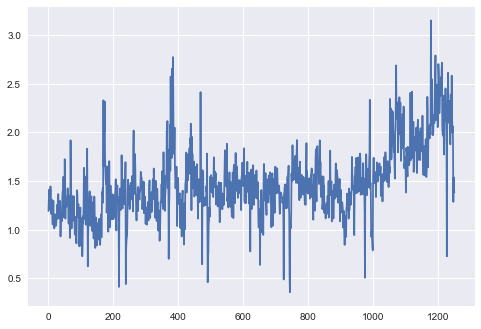

In [23]:
plt.plot(smarket.Volume);

# 4.6.2 Logistic Regression

### Using scikit-learn 

In [62]:
from sklearn.linear_model import LogisticRegression

X_sk = smarket.loc[:,'Lag1':'Volume']

print(X_sk.columns)


Index(['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume'], dtype='object')


In [63]:
print(list(X_sk))

['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']


In [64]:
y_sk = smarket.Direction

logreg = LogisticRegression(C=1e9) # Large C for no regularization
logreg.fit(X_sk, y_sk)

y_pred = logreg.predict(X_sk)

In [65]:
logreg.intercept_, logreg.coef_

(array([-0.12594106]),
 array([[-0.0730727 , -0.04230009,  0.01108405,  0.0093593 ,  0.01031206,
          0.13540187]]))

In [66]:
# prediction summary
pd.DataFrame({'prob_0':logreg.predict_proba(X_sk)[:, 0], 
              'prob_1': logreg.predict_proba(X_sk)[:, 1], 
              'pred_class': y_pred}, 
             columns=['prob_0', 'prob_1', 'pred_class'])

,prob_0,prob_1,pred_class
0,0.49,0.51,Up
1,0.52,0.48,Down
2,0.52,0.48,Down
3,0.48,0.52,Up
4,0.49,0.51,Up
5,0.49,0.51,Up
...,...,...,...
1244,0.47,0.53,Up
1245,0.48,0.52,Up
1246,0.49,0.51,Up


In [67]:
from sklearn.metrics import confusion_matrix, accuracy_score

# labeled confusion matrix for predicted values
conf_m = pd.DataFrame(confusion_matrix(y_sk, y_pred))
conf_m.columns.name = 'Predicted'
conf_m.index.name = 'True'
conf_m

Predicted,0,1
True,,
0,145,457
1,141,507


In [68]:
print('Accuracy: ' + str(accuracy_score(y_sk, y_pred)))
print('Training Error: ' + str(1 - accuracy_score(y_sk, y_pred)))

Accuracy: 0.5216
Training Error: 0.4784


### Using scikit-learn 
Train: ~ 2004 데이터  
Test:  2005 ~ 데이터  
feature: Lag1 ... Volumn  

In [7]:
# separate training and test sets
train = smarket.loc[smarket.Year < 2005]
test = smarket.loc[smarket.Year >= 2005]

In [85]:
X_train = train.loc[:,'Lag1':'Volume']
y_train = train.Direction

X_test = test.loc[:,'Lag1':'Volume']
y_test = test.Direction

logreg = LogisticRegression(C=1e9) # Large C for no regularization
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [86]:
# prediction summary
pd.DataFrame({'prob_0': logreg.predict_proba(X_test)[:, 0], 
              'prob_1': logreg.predict_proba(X_test)[:, 1], 
              'pred_class': y_pred}, 
             columns=['prob_0', 'prob_1', 'pred_class'])

,prob_0,prob_1,pred_class
0,0.47,0.53,Up
1,0.48,0.52,Up
2,0.48,0.52,Up
3,0.49,0.51,Up
4,0.50,0.50,Down
5,0.50,0.50,Up
...,...,...,...
246,0.52,0.48,Down
247,0.52,0.48,Down
248,0.49,0.51,Up


In [87]:
conf_m = pd.DataFrame(confusion_matrix(y_test, y_pred))
conf_m.columns.name = 'Predicted'
conf_m.index.name = 'True'
conf_m

Predicted,0,1
True,,
0,77,34
1,97,44


In [88]:
print('Accuracy: ' + str(accuracy_score(y_test, y_pred)))
print('Test Error: ' + str(1 - accuracy_score(y_test, y_pred)))

Accuracy: 0.480158730159
Test Error: 0.519841269841


### Using scikit-learn 
Train: ~ 2004 데이터  
Test:  2005 ~ 데이터  
feature: Lag1, Lag2  

In [89]:
X_train = train.loc[:,'Lag1':'Lag2']
y_train = train.Direction

X_test = test.loc[:,'Lag1':'Lag2']
y_test = test.Direction

logreg = LogisticRegression(C=1e9) # Large C for no regularization
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [90]:
# prediction summary
pd.DataFrame({'prob_0': logreg.predict_proba(X_test)[:, 0], 
              'prob_1': logreg.predict_proba(X_test)[:, 1], 
              'pred_class': y_pred}, 
             columns=['prob_0', 'prob_1', 'pred_class'])

,prob_0,prob_1,pred_class
0,0.49,0.51,Up
1,0.48,0.52,Up
2,0.47,0.53,Up
3,0.47,0.53,Up
4,0.49,0.51,Up
5,0.49,0.51,Up
...,...,...,...
246,0.50,0.50,Up
247,0.50,0.50,Down
248,0.50,0.50,Up


In [91]:
conf_m = pd.DataFrame(confusion_matrix(y_test, y_pred))
conf_m.columns.name = 'Predicted'
conf_m.index.name = 'True'
conf_m

Predicted,0,1
True,,
0,35,76
1,35,106


In [92]:
print('Accuracy: ' + str(accuracy_score(y_test, y_pred)))
print('Test Error: ' + str(1 - accuracy_score(y_test, y_pred)))

Accuracy: 0.559523809524
Test Error: 0.440476190476


In [93]:
# predictions for arbitrary data

predict_data = pd.DataFrame({'Lag1': [1.2, 1.5], 'Lag2': [1.1, -0.8]})

logreg.predict_proba(predict_data)[:, 1]

array([ 0.47914634,  0.49609395])

###  Regularization  with l1 (엘원)  
Lasso를 의미

In [56]:
X_train = train.loc[:,'Lag1':'Volume']
y_train = train.Direction

X_test = test.loc[:,'Lag1':'Volume']
y_test = test.Direction

logreg = LogisticRegression(penalty='l1') # Large C for no regularization
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [53]:
logreg.intercept_, logreg.coef_

(array([ 0.02822292]),
 array([[-0.05279208, -0.04155372,  0.00634562,  0.00593556, -0.00071859,
          0.        ]]))

In [54]:
# prediction summary
pd.DataFrame({'prob_0': logreg.predict_proba(X_test)[:, 0], 
              'prob_1': logreg.predict_proba(X_test)[:, 1], 
              'pred_class': y_pred}, 
             columns=['prob_0', 'prob_1', 'pred_class'])

,prob_0,prob_1,pred_class
0,0.49,0.51,Up
1,0.48,0.52,Up
2,0.47,0.53,Up
3,0.48,0.52,Up
4,0.50,0.50,Up
5,0.50,0.50,Up
...,...,...,...
246,0.50,0.50,Up
247,0.50,0.50,Down
248,0.50,0.50,Up


In [50]:
conf_m = pd.DataFrame(confusion_matrix(y_test, y_pred))
conf_m.columns.name = 'Predicted'
conf_m.index.name = 'True'
conf_m

Predicted,0,1
True,,
0,38,73
1,34,107


In [51]:
print('Accuracy: ' + str(accuracy_score(y_test, y_pred)))
print('Test Error: ' + str(1 - accuracy_score(y_test, y_pred)))

Accuracy: 0.575396825397
Test Error: 0.424603174603


##  Regularization  with l2 (엘투)

Ridge regression을 의미

In [57]:
X_train = train.loc[:,'Lag1':'Volume']
y_train = train.Direction

X_test = test.loc[:,'Lag1':'Volume']
y_test = test.Direction

logreg = LogisticRegression(penalty='l2') # Large C for no regularization
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [58]:
logreg.intercept_, logreg.coef_

(array([ 0.16516961]),
 array([[-0.05423894, -0.04542453,  0.00745773,  0.00675954, -0.00405469,
         -0.09769463]]))

In [59]:
# prediction summary
pd.DataFrame({'prob_0': logreg.predict_proba(X_test)[:, 0], 
              'prob_1': logreg.predict_proba(X_test)[:, 1], 
              'pred_class': y_pred}, 
             columns=['prob_0', 'prob_1', 'pred_class'])

,prob_0,prob_1,pred_class
0,0.47,0.53,Up
1,0.48,0.52,Up
2,0.48,0.52,Up
3,0.48,0.52,Up
4,0.50,0.50,Down
5,0.50,0.50,Up
...,...,...,...
246,0.51,0.49,Down
247,0.51,0.49,Down
248,0.49,0.51,Up


In [60]:
conf_m = pd.DataFrame(confusion_matrix(y_test, y_pred))
conf_m.columns.name = 'Predicted'
conf_m.index.name = 'True'
conf_m

Predicted,0,1
True,,
0,71,40
1,89,52


In [61]:
print('Accuracy: ' + str(accuracy_score(y_test, y_pred)))
print('Test Error: ' + str(1 - accuracy_score(y_test, y_pred)))

Accuracy: 0.488095238095
Test Error: 0.511904761905
